In [14]:
import pandas as pd
from models.energy.energy_models import energy_baseline, energy_LSTM, energy_XGBoost, energy_quantile_regression
from functions import get_energy, evaluate_energy

## Validation set for hyperparameter tuning

In [50]:
energydata = get_energy.get(last_years=5)

  0%|          | 0/274 [00:00<?, ?it/s]/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/functions/get_energy.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  energydata = pd.concat([energydata, pd.DataFrame(rawdata, columns=col_names)])
100%|██████████| 274/274 [00:28<00:00,  9.47it/s]


{'2020-12-25', '2019-06-10', '2020-01-01', '2023-01-01', '2024-05-01', '2024-05-09', '2023-04-10', '2024-04-01', '2020-05-01', '2021-12-26', '2023-04-07', '2022-10-03', '2024-05-20', '2020-12-26', '2022-04-18', '2023-12-26', '2019-04-19', '2021-05-01', '2024-10-03', '2022-06-06', '2023-05-29', '2022-12-25', '2020-04-10', '2023-05-01', '2020-10-03', '2020-05-21', '2022-04-15', '2024-12-25', '2019-01-01', '2021-04-02', '2019-04-22', '2021-10-03', '2021-05-13', '2020-04-13', '2021-12-25', '2022-05-26', '2019-05-30', '2023-12-25', '2022-12-26', '2024-03-29', '2019-12-26', '2021-01-01', '2019-12-25', '2023-10-03', '2022-01-01', '2019-10-03', '2019-05-01', '2021-05-24', '2020-06-01', '2021-04-05', '2023-05-18', '2024-01-01', '2024-12-26', '2022-05-01'}


In [51]:
energydata

,gesamt,weekday
date_time,,
2019-01-02 00:00:00,43.82725,2
2019-01-02 01:00:00,42.32400,2
2019-01-02 02:00:00,41.93725,2
2019-01-02 03:00:00,42.42775,2
2019-01-02 04:00:00,43.85550,2
...,...,...
2024-03-21 11:00:00,63.33875,3
2024-03-21 12:00:00,61.69650,3
2024-03-21 13:00:00,60.47450,3


In [15]:
def run_evaluation(last_years=5, start_date='2023-01-01', end_date='2024-12-31'):
    # Load data with custom exclusions for holidays and specific periods
    energydata = get_energy.get(last_years=last_years)
    
    # Define models to evaluate
    models_to_evaluate = [
        {'name': 'Baseline', 'function': energy_baseline},
        {'name': 'Quantile Regression', 'function': energy_quantile_regression},
        {'name': 'XGBoost', 'function': energy_XGBoost},
        {'name': 'LSTM', 'function': energy_LSTM}
    ]
    
    # Evaluate models
    evaluations, grouped_scores = evaluate_energy.evaluate(*models_to_evaluate, df=energydata, start_date=start_date, end_date=end_date, horizon_format="hours")
    
    return evaluations, grouped_scores

### Run validation for horizon of 3,4 and 5 years

  0%|          | 0/274 [00:00<?, ?it/s]/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/functions/get_energy.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  energydata = pd.concat([energydata, pd.DataFrame(rawdata, columns=col_names)])
100%|██████████| 274/274 [00:28<00:00,  9.64it/s]
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/ste

{'2020-12-25', '2019-06-10', '2020-01-01', '2023-01-01', '2024-05-01', '2024-05-09', '2023-04-10', '2024-04-01', '2020-05-01', '2021-12-26', '2023-04-07', '2022-10-03', '2024-05-20', '2020-12-26', '2022-04-18', '2023-12-26', '2019-04-19', '2021-05-01', '2024-10-03', '2022-06-06', '2023-05-29', '2022-12-25', '2020-04-10', '2023-05-01', '2020-10-03', '2020-05-21', '2022-04-15', '2024-12-25', '2019-01-01', '2021-04-02', '2019-04-22', '2021-10-03', '2021-05-13', '2020-04-13', '2021-12-25', '2022-05-26', '2019-05-30', '2023-12-25', '2022-12-26', '2024-03-29', '2019-12-26', '2021-01-01', '2019-12-25', '2023-10-03', '2022-01-01', '2019-10-03', '2019-05-01', '2021-05-24', '2020-06-01', '2021-04-05', '2023-05-18', '2024-01-01', '2024-12-26', '2022-05-01'}


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying 

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5436
Model:                       QuantReg   Bandwidth:                      0.6787
Method:                 Least Squares   Sparsity:                        11.61
Date:                Thu, 21 Mar 2024   No. Observations:                39099
Time:                        12:33:01   Df Residuals:                    39063
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8840      0.181    331.458      0.000      59.530      60.238
weekday       -1.8734      0.015   -127.288      0.000      -1.902      -1.845
month_2       -0.6885      0.144     -4.778      0.000      -0.971      -0.406
month_3       -4.3890      0.141    -31.196      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5437
Model:                       QuantReg   Bandwidth:                      0.6765
Method:                 Least Squares   Sparsity:                        11.58
Date:                Thu, 21 Mar 2024   No. Observations:                39267
Time:                        12:33:39   Df Residuals:                    39231
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8822      0.180    332.738      0.000      59.530      60.235
weekday       -1.8733      0.015   -127.863      0.000      -1.902      -1.845
month_2       -0.6872      0.144     -4.781      0.000      -0.969      -0.406
month_3       -4.3755      0.140    -31.176      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5435
Model:                       QuantReg   Bandwidth:                      0.6762
Method:                 Least Squares   Sparsity:                        11.64
Date:                Thu, 21 Mar 2024   No. Observations:                39435
Time:                        12:34:07   Df Residuals:                    39399
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.9069      0.181    331.767      0.000      59.553      60.261
weekday       -1.8752      0.015   -127.661      0.000      -1.904      -1.846
month_2       -0.6920      0.144     -4.791      0.000      -0.975      -0.409
month_3       -4.3894      0.141    -31.126      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationL

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5433
Model:                       QuantReg   Bandwidth:                      0.6750
Method:                 Least Squares   Sparsity:                        11.69
Date:                Thu, 21 Mar 2024   No. Observations:                39603
Time:                        12:35:03   Df Residuals:                    39567
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8803      0.181    330.664      0.000      59.525      60.235
weekday       -1.8721      0.015   -127.173      0.000      -1.901      -1.843
month_2       -0.6753      0.145     -4.656      0.000      -0.960      -0.391
month_3       -4.3693      0.142    -30.851      0.0

2024-03-21 12:35:50.021759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:35:50.022596: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:35:50.023052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

435/435 - 3s - loss: 0.8423 - val_loss: 0.7988 - 3s/epoch - 8ms/step
Epoch 2/10
435/435 - 2s - loss: 0.8159 - val_loss: 0.7829 - 2s/epoch - 5ms/step
Epoch 3/10
435/435 - 2s - loss: 0.7908 - val_loss: 0.7711 - 2s/epoch - 5ms/step
Epoch 4/10
435/435 - 2s - loss: 0.7816 - val_loss: 0.7584 - 2s/epoch - 5ms/step
Epoch 5/10
435/435 - 2s - loss: 0.7771 - val_loss: 0.7582 - 2s/epoch - 5ms/step
Epoch 6/10
435/435 - 2s - loss: 0.7750 - val_loss: 0.7594 - 2s/epoch - 5ms/step
Epoch 7/10
435/435 - 2s - loss: 0.7738 - val_loss: 0.7598 - 2s/epoch - 5ms/step
Epoch 8/10
435/435 - 2s - loss: 0.7731 - val_loss: 0.7603 - 2s/epoch - 5ms/step
Epoch 9/10
435/435 - 2s - loss: 0.7727 - val_loss: 0.7605 - 2s/epoch - 5ms/step
Epoch 10/10
435/435 - 2s - loss: 0.7724 - val_loss: 0.7607 - 2s/epoch - 5ms/step
1/1 [==============================] - 0s 253ms/step


2024-03-21 12:36:12.104954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:36:12.105467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:36:12.106041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-03-21 12:36:12.363606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:36:12.364048: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:36:12.364501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

436/436 - 3s - loss: 0.8415 - val_loss: 0.7949 - 3s/epoch - 7ms/step
Epoch 2/10
436/436 - 2s - loss: 0.8135 - val_loss: 0.7793 - 2s/epoch - 4ms/step
Epoch 3/10
436/436 - 2s - loss: 0.7900 - val_loss: 0.7650 - 2s/epoch - 4ms/step
Epoch 4/10
436/436 - 2s - loss: 0.7805 - val_loss: 0.7561 - 2s/epoch - 4ms/step
Epoch 5/10
436/436 - 2s - loss: 0.7764 - val_loss: 0.7580 - 2s/epoch - 4ms/step
Epoch 6/10
436/436 - 2s - loss: 0.7746 - val_loss: 0.7597 - 2s/epoch - 4ms/step
Epoch 7/10
436/436 - 2s - loss: 0.7737 - val_loss: 0.7600 - 2s/epoch - 4ms/step
Epoch 8/10
436/436 - 2s - loss: 0.7731 - val_loss: 0.7599 - 2s/epoch - 4ms/step
Epoch 9/10
436/436 - 2s - loss: 0.7727 - val_loss: 0.7599 - 2s/epoch - 5ms/step
Epoch 10/10
436/436 - 2s - loss: 0.7724 - val_loss: 0.7598 - 2s/epoch - 5ms/step


2024-03-21 12:36:31.945023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:36:31.945766: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:36:31.946626: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 306ms/step
Epoch 1/10


2024-03-21 12:36:32.316038: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:36:32.316907: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:36:32.317321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

438/438 - 4s - loss: 0.8417 - val_loss: 0.8001 - 4s/epoch - 9ms/step
Epoch 2/10
438/438 - 2s - loss: 0.8169 - val_loss: 0.7843 - 2s/epoch - 4ms/step
Epoch 3/10
438/438 - 2s - loss: 0.7910 - val_loss: 0.7760 - 2s/epoch - 4ms/step
Epoch 4/10
438/438 - 2s - loss: 0.7810 - val_loss: 0.7653 - 2s/epoch - 4ms/step
Epoch 5/10
438/438 - 2s - loss: 0.7766 - val_loss: 0.7654 - 2s/epoch - 4ms/step
Epoch 6/10
438/438 - 2s - loss: 0.7747 - val_loss: 0.7661 - 2s/epoch - 4ms/step
Epoch 7/10
438/438 - 2s - loss: 0.7737 - val_loss: 0.7658 - 2s/epoch - 4ms/step
Epoch 8/10
438/438 - 2s - loss: 0.7732 - val_loss: 0.7658 - 2s/epoch - 4ms/step
Epoch 9/10
438/438 - 2s - loss: 0.7728 - val_loss: 0.7658 - 2s/epoch - 4ms/step
Epoch 10/10
438/438 - 4s - loss: 0.7726 - val_loss: 0.7657 - 4s/epoch - 8ms/step
1/1 [==============================] - 0s 276ms/step


2024-03-21 12:36:54.228887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:36:54.229610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:36:54.230020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-03-21 12:36:54.553806: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:36:54.554556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:36:54.555011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

440/440 - 7s - loss: 0.8413 - val_loss: 0.7999 - 7s/epoch - 15ms/step
Epoch 2/10
440/440 - 3s - loss: 0.8166 - val_loss: 0.7741 - 3s/epoch - 6ms/step
Epoch 3/10
440/440 - 2s - loss: 0.7902 - val_loss: 0.7648 - 2s/epoch - 5ms/step
Epoch 4/10
440/440 - 2s - loss: 0.7803 - val_loss: 0.7550 - 2s/epoch - 4ms/step
Epoch 5/10
440/440 - 2s - loss: 0.7762 - val_loss: 0.7556 - 2s/epoch - 4ms/step
Epoch 6/10
440/440 - 2s - loss: 0.7746 - val_loss: 0.7564 - 2s/epoch - 4ms/step
Epoch 7/10
440/440 - 2s - loss: 0.7737 - val_loss: 0.7559 - 2s/epoch - 4ms/step
Epoch 8/10
440/440 - 2s - loss: 0.7732 - val_loss: 0.7552 - 2s/epoch - 4ms/step
Epoch 9/10
440/440 - 2s - loss: 0.7729 - val_loss: 0.7548 - 2s/epoch - 5ms/step
Epoch 10/10
440/440 - 2s - loss: 0.7727 - val_loss: 0.7545 - 2s/epoch - 4ms/step
1/1 [==============================] - 0s 275ms/step


2024-03-21 12:37:18.304476: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:37:18.305307: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:37:18.305913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

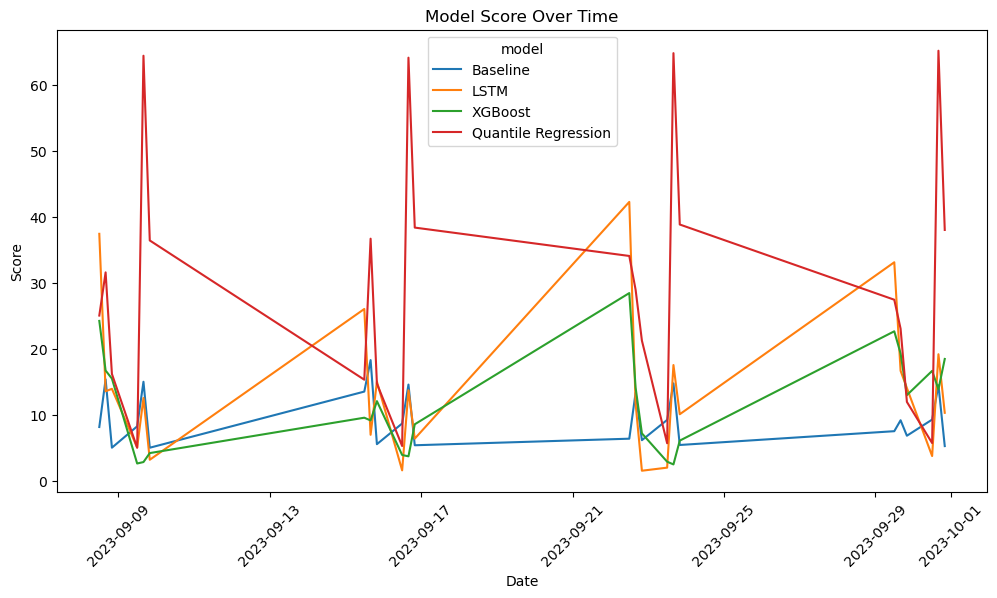

In [16]:
# Specify the evaluation period
start_date = '2023-09-01'
end_date = '2023-09-30'

# Run the evaluation
evaluations_5, grouped_scores_5 = run_evaluation(last_years=5, start_date=start_date, end_date=end_date)

# You can now work with `evaluations` and `grouped_scores` for further analysis, comparison, or reporting.


  0%|          | 0/274 [00:00<?, ?it/s]/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/functions/get_energy.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  energydata = pd.concat([energydata, pd.DataFrame(rawdata, columns=col_names)])
100%|██████████| 274/274 [00:34<00:00,  7.89it/s]
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/ste

{'2020-12-25', '2024-05-01', '2020-01-01', '2023-01-01', '2024-05-09', '2023-04-10', '2024-04-01', '2020-05-01', '2021-12-26', '2023-04-07', '2022-10-03', '2024-05-20', '2020-12-26', '2022-04-18', '2023-12-26', '2021-05-01', '2024-10-03', '2022-06-06', '2023-05-29', '2022-12-25', '2020-04-10', '2023-05-01', '2020-10-03', '2020-05-21', '2022-04-15', '2024-12-25', '2021-04-02', '2021-10-03', '2021-05-13', '2020-04-13', '2021-12-25', '2022-05-26', '2023-12-25', '2022-12-26', '2024-03-29', '2021-01-01', '2023-10-03', '2022-01-01', '2021-05-24', '2020-06-01', '2021-04-05', '2023-05-18', '2024-01-01', '2024-12-26', '2022-05-01'}


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying 

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5420
Model:                       QuantReg   Bandwidth:                      0.7262
Method:                 Least Squares   Sparsity:                        11.32
Date:                Thu, 21 Mar 2024   No. Observations:                30790
Time:                        12:38:02   Df Residuals:                    30754
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.0910      0.198    298.746      0.000      58.703      59.479
weekday       -1.7937      0.016   -110.827      0.000      -1.825      -1.762
month_2       -0.1015      0.157     -0.648      0.517      -0.408       0.205
month_3       -4.0078      0.153    -26.208      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5423
Model:                       QuantReg   Bandwidth:                      0.7246
Method:                 Least Squares   Sparsity:                        11.28
Date:                Thu, 21 Mar 2024   No. Observations:                30958
Time:                        12:38:15   Df Residuals:                    30922
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.0903      0.197    300.184      0.000      58.705      59.476
weekday       -1.7939      0.016   -111.475      0.000      -1.825      -1.762
month_2       -0.0866      0.156     -0.555      0.579      -0.393       0.219
month_3       -3.9923      0.152    -26.185      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5424
Model:                       QuantReg   Bandwidth:                      0.7233
Method:                 Least Squares   Sparsity:                        11.27
Date:                Thu, 21 Mar 2024   No. Observations:                31126
Time:                        12:38:33   Df Residuals:                    31090
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.1049      0.196    301.138      0.000      58.720      59.490
weekday       -1.7929      0.016   -111.838      0.000      -1.824      -1.761
month_2       -0.0916      0.156     -0.587      0.557      -0.397       0.214
month_3       -3.9964      0.152    -26.241      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5422
Model:                       QuantReg   Bandwidth:                      0.7228
Method:                 Least Squares   Sparsity:                        11.27
Date:                Thu, 21 Mar 2024   No. Observations:                31294
Time:                        12:38:49   Df Residuals:                    31258
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.1105      0.196    301.686      0.000      58.726      59.495
weekday       -1.7955      0.016   -112.299      0.000      -1.827      -1.764
month_2       -0.0915      0.156     -0.587      0.557      -0.397       0.214
month_3       -4.0021      0.152    -26.276      0.0

2024-03-21 12:39:22.786714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:39:22.787706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:39:22.788475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

342/342 - 3s - loss: 0.8376 - val_loss: 0.7892 - 3s/epoch - 9ms/step
Epoch 2/10
342/342 - 1s - loss: 0.8204 - val_loss: 0.7747 - 1s/epoch - 4ms/step
Epoch 3/10
342/342 - 1s - loss: 0.7971 - val_loss: 0.8070 - 1s/epoch - 4ms/step
Epoch 4/10
342/342 - 1s - loss: 0.7833 - val_loss: 0.7998 - 1s/epoch - 4ms/step
Epoch 5/10
342/342 - 1s - loss: 0.7750 - val_loss: 0.7844 - 1s/epoch - 4ms/step
Epoch 6/10
342/342 - 1s - loss: 0.7706 - val_loss: 0.7799 - 1s/epoch - 4ms/step
Epoch 7/10
342/342 - 1s - loss: 0.7685 - val_loss: 0.7755 - 1s/epoch - 4ms/step
Epoch 8/10
342/342 - 1s - loss: 0.7673 - val_loss: 0.7728 - 1s/epoch - 4ms/step
Epoch 9/10
342/342 - 1s - loss: 0.7666 - val_loss: 0.7702 - 1s/epoch - 4ms/step
Epoch 10/10
342/342 - 1s - loss: 0.7661 - val_loss: 0.7690 - 1s/epoch - 4ms/step
1/1 [==============================] - 0s 231ms/step


2024-03-21 12:39:36.894681: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:39:36.895132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:39:36.895706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-03-21 12:39:37.141782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:39:37.142212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:39:37.142648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

344/344 - 3s - loss: 0.8383 - val_loss: 0.7879 - 3s/epoch - 8ms/step
Epoch 2/10
344/344 - 1s - loss: 0.8200 - val_loss: 0.7688 - 1s/epoch - 4ms/step
Epoch 3/10
344/344 - 1s - loss: 0.7943 - val_loss: 0.8093 - 1s/epoch - 4ms/step
Epoch 4/10
344/344 - 1s - loss: 0.7817 - val_loss: 0.7863 - 1s/epoch - 4ms/step
Epoch 5/10
344/344 - 1s - loss: 0.7741 - val_loss: 0.7788 - 1s/epoch - 4ms/step
Epoch 6/10
344/344 - 1s - loss: 0.7704 - val_loss: 0.7774 - 1s/epoch - 4ms/step
Epoch 7/10
344/344 - 1s - loss: 0.7685 - val_loss: 0.7739 - 1s/epoch - 4ms/step
Epoch 8/10
344/344 - 1s - loss: 0.7674 - val_loss: 0.7710 - 1s/epoch - 4ms/step
Epoch 9/10
344/344 - 1s - loss: 0.7667 - val_loss: 0.7682 - 1s/epoch - 4ms/step
Epoch 10/10
344/344 - 1s - loss: 0.7662 - val_loss: 0.7664 - 1s/epoch - 4ms/step
1/1 [==============================] - 0s 224ms/step


2024-03-21 12:39:51.181188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:39:51.181575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:39:51.182067: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-03-21 12:39:51.422895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:39:51.423411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:39:51.424026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

346/346 - 3s - loss: 0.8400 - val_loss: 0.7875 - 3s/epoch - 8ms/step
Epoch 2/10
346/346 - 1s - loss: 0.8245 - val_loss: 0.7729 - 1s/epoch - 4ms/step
Epoch 3/10
346/346 - 1s - loss: 0.7998 - val_loss: 0.7937 - 1s/epoch - 4ms/step
Epoch 4/10
346/346 - 1s - loss: 0.7814 - val_loss: 0.7871 - 1s/epoch - 4ms/step
Epoch 5/10
346/346 - 1s - loss: 0.7737 - val_loss: 0.7763 - 1s/epoch - 4ms/step
Epoch 6/10
346/346 - 1s - loss: 0.7702 - val_loss: 0.7726 - 1s/epoch - 4ms/step
Epoch 7/10
346/346 - 1s - loss: 0.7685 - val_loss: 0.7686 - 1s/epoch - 4ms/step
Epoch 8/10
346/346 - 1s - loss: 0.7673 - val_loss: 0.7651 - 1s/epoch - 4ms/step
Epoch 9/10
346/346 - 1s - loss: 0.7665 - val_loss: 0.7620 - 1s/epoch - 4ms/step
Epoch 10/10
346/346 - 1s - loss: 0.7658 - val_loss: 0.7596 - 1s/epoch - 4ms/step
1/1 [==============================] - 0s 221ms/step


2024-03-21 12:40:06.213465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:40:06.213854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:40:06.214212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-03-21 12:40:06.452954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:40:06.453342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:40:06.453696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

348/348 - 3s - loss: 0.8393 - val_loss: 0.7996 - 3s/epoch - 7ms/step
Epoch 2/10
348/348 - 1s - loss: 0.8244 - val_loss: 0.7848 - 1s/epoch - 4ms/step
Epoch 3/10
348/348 - 1s - loss: 0.8008 - val_loss: 0.8017 - 1s/epoch - 4ms/step
Epoch 4/10
348/348 - 1s - loss: 0.7829 - val_loss: 0.7951 - 1s/epoch - 4ms/step
Epoch 5/10
348/348 - 1s - loss: 0.7747 - val_loss: 0.7847 - 1s/epoch - 4ms/step
Epoch 6/10
348/348 - 1s - loss: 0.7708 - val_loss: 0.7820 - 1s/epoch - 4ms/step
Epoch 7/10
348/348 - 1s - loss: 0.7690 - val_loss: 0.7787 - 1s/epoch - 4ms/step
Epoch 8/10
348/348 - 1s - loss: 0.7678 - val_loss: 0.7753 - 1s/epoch - 4ms/step
Epoch 9/10
348/348 - 1s - loss: 0.7669 - val_loss: 0.7726 - 1s/epoch - 4ms/step
Epoch 10/10
348/348 - 1s - loss: 0.7664 - val_loss: 0.7704 - 1s/epoch - 4ms/step
1/1 [==============================] - 0s 218ms/step


2024-03-21 12:40:21.005476: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:40:21.005987: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:40:21.006521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

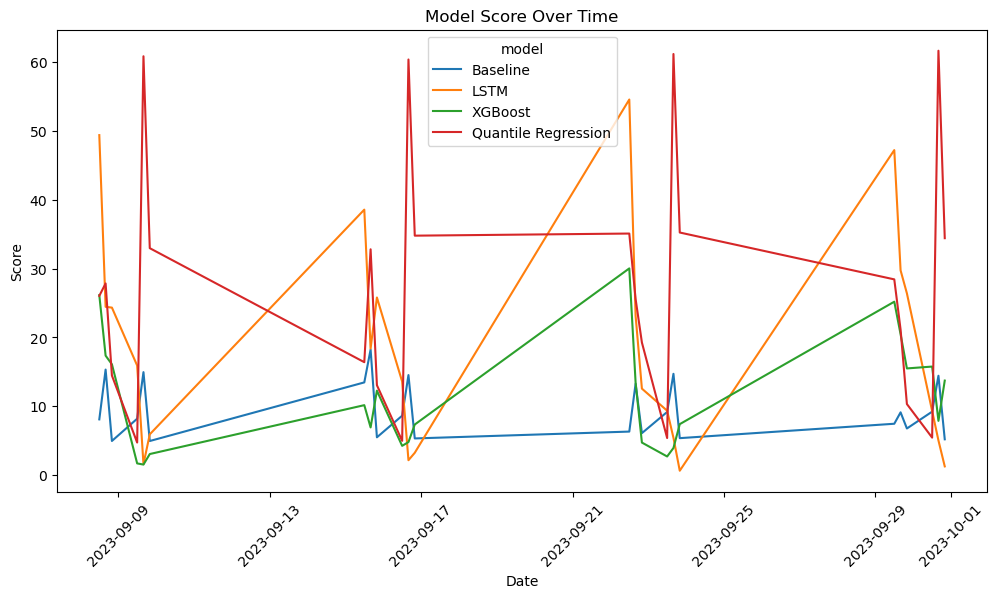

In [17]:
#do the same for other last years
evaluations_4, grouped_scores_4 = run_evaluation(last_years=4, start_date=start_date, end_date=end_date)

  0%|          | 0/274 [00:00<?, ?it/s]/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/functions/get_energy.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  energydata = pd.concat([energydata, pd.DataFrame(rawdata, columns=col_names)])
100%|██████████| 274/274 [00:36<00:00,  7.51it/s]
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/ste

{'2024-05-09', '2024-05-01', '2023-01-01', '2023-04-10', '2024-04-01', '2021-12-26', '2023-04-07', '2022-10-03', '2024-05-20', '2022-04-18', '2023-12-26', '2024-10-03', '2021-05-01', '2022-06-06', '2023-05-29', '2022-12-25', '2023-05-01', '2024-12-25', '2022-04-15', '2021-04-02', '2021-10-03', '2021-05-13', '2021-12-25', '2022-05-26', '2023-12-25', '2022-12-26', '2024-03-29', '2021-01-01', '2023-10-03', '2022-01-01', '2021-05-24', '2021-04-05', '2023-05-18', '2024-01-01', '2024-12-26', '2022-05-01'}


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying 

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5304
Model:                       QuantReg   Bandwidth:                      0.8178
Method:                 Least Squares   Sparsity:                        11.87
Date:                Thu, 21 Mar 2024   No. Observations:                22457
Time:                        12:41:08   Df Residuals:                    22421
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.7697      0.241    243.698      0.000      58.297      59.242
weekday       -1.7839      0.020    -89.753      0.000      -1.823      -1.745
month_2       -0.0665      0.189     -0.352      0.725      -0.437       0.304
month_3       -3.3993      0.184    -18.439      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5310
Model:                       QuantReg   Bandwidth:                      0.8147
Method:                 Least Squares   Sparsity:                        11.78
Date:                Thu, 21 Mar 2024   No. Observations:                22625
Time:                        12:41:14   Df Residuals:                    22589
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.7560      0.239    246.114      0.000      58.288      59.224
weekday       -1.7853      0.020    -90.843      0.000      -1.824      -1.747
month_2       -0.0667      0.188     -0.355      0.722      -0.435       0.301
month_3       -3.3793      0.183    -18.469      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5313
Model:                       QuantReg   Bandwidth:                      0.8124
Method:                 Least Squares   Sparsity:                        11.72
Date:                Thu, 21 Mar 2024   No. Observations:                22793
Time:                        12:41:26   Df Residuals:                    22757
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.6995      0.237    247.621      0.000      58.235      59.164
weekday       -1.7837      0.019    -91.517      0.000      -1.822      -1.746
month_2       -0.0330      0.187     -0.177      0.860      -0.399       0.333
month_3       -3.3661      0.182    -18.480      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5313
Model:                       QuantReg   Bandwidth:                      0.8106
Method:                 Least Squares   Sparsity:                        11.77
Date:                Thu, 21 Mar 2024   No. Observations:                22961
Time:                        12:41:36   Df Residuals:                    22925
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.7004      0.237    247.295      0.000      58.235      59.166
weekday       -1.7876      0.019    -91.704      0.000      -1.826      -1.749
month_2       -0.0236      0.188     -0.126      0.900      -0.391       0.344
month_3       -3.3625      0.183    -18.391      0.0

2024-03-21 12:42:00.270869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:42:00.271962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:42:00.272441: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

250/250 - 2s - loss: 0.8430 - val_loss: 0.8436 - 2s/epoch - 10ms/step
Epoch 2/10
250/250 - 1s - loss: 0.8259 - val_loss: 0.8260 - 1s/epoch - 4ms/step
Epoch 3/10
250/250 - 1s - loss: 0.8087 - val_loss: 0.7861 - 1s/epoch - 4ms/step
Epoch 4/10
250/250 - 1s - loss: 0.8005 - val_loss: 0.7599 - 1s/epoch - 4ms/step
Epoch 5/10
250/250 - 1s - loss: 0.7962 - val_loss: 0.7372 - 1s/epoch - 4ms/step
Epoch 6/10
250/250 - 1s - loss: 0.7893 - val_loss: 0.7234 - 1s/epoch - 4ms/step
Epoch 7/10
250/250 - 1s - loss: 0.7840 - val_loss: 0.7175 - 1s/epoch - 4ms/step
Epoch 8/10
250/250 - 1s - loss: 0.7808 - val_loss: 0.7149 - 1s/epoch - 4ms/step
Epoch 9/10
250/250 - 1s - loss: 0.7796 - val_loss: 0.7142 - 1s/epoch - 4ms/step
Epoch 10/10
250/250 - 1s - loss: 0.7789 - val_loss: 0.7147 - 1s/epoch - 5ms/step
1/1 [==============================] - 0s 230ms/step


2024-03-21 12:42:12.734713: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:42:12.735094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:42:12.735465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-03-21 12:42:12.997872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:42:12.998365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:42:12.998962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

252/252 - 2s - loss: 0.8424 - val_loss: 0.8546 - 2s/epoch - 10ms/step
Epoch 2/10
252/252 - 1s - loss: 0.8249 - val_loss: 0.8322 - 1s/epoch - 4ms/step
Epoch 3/10
252/252 - 1s - loss: 0.8070 - val_loss: 0.7954 - 1s/epoch - 4ms/step
Epoch 4/10
252/252 - 1s - loss: 0.8005 - val_loss: 0.7712 - 1s/epoch - 4ms/step
Epoch 5/10
252/252 - 1s - loss: 0.7965 - val_loss: 0.7525 - 1s/epoch - 4ms/step
Epoch 6/10
252/252 - 1s - loss: 0.7913 - val_loss: 0.7405 - 1s/epoch - 4ms/step
Epoch 7/10
252/252 - 1s - loss: 0.7867 - val_loss: 0.7334 - 1s/epoch - 4ms/step
Epoch 8/10
252/252 - 1s - loss: 0.7835 - val_loss: 0.7289 - 1s/epoch - 4ms/step
Epoch 9/10
252/252 - 1s - loss: 0.7815 - val_loss: 0.7267 - 1s/epoch - 4ms/step
Epoch 10/10
252/252 - 1s - loss: 0.7802 - val_loss: 0.7261 - 1s/epoch - 4ms/step
1/1 [==============================] - 0s 218ms/step


2024-03-21 12:42:25.382572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:42:25.382964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:42:25.383323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-03-21 12:42:25.614635: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:42:25.615080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:42:25.615566: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

254/254 - 2s - loss: 0.8423 - val_loss: 0.8560 - 2s/epoch - 9ms/step
Epoch 2/10
254/254 - 1s - loss: 0.8259 - val_loss: 0.8318 - 1s/epoch - 4ms/step
Epoch 3/10
254/254 - 1s - loss: 0.8089 - val_loss: 0.8022 - 1s/epoch - 4ms/step
Epoch 4/10
254/254 - 1s - loss: 0.8022 - val_loss: 0.7771 - 1s/epoch - 4ms/step
Epoch 5/10
254/254 - 1s - loss: 0.7988 - val_loss: 0.7547 - 1s/epoch - 4ms/step
Epoch 6/10
254/254 - 1s - loss: 0.7935 - val_loss: 0.7404 - 1s/epoch - 4ms/step
Epoch 7/10
254/254 - 1s - loss: 0.7887 - val_loss: 0.7325 - 1s/epoch - 5ms/step
Epoch 8/10
254/254 - 1s - loss: 0.7853 - val_loss: 0.7275 - 1s/epoch - 4ms/step
Epoch 9/10
254/254 - 1s - loss: 0.7834 - val_loss: 0.7253 - 1s/epoch - 4ms/step
Epoch 10/10
254/254 - 1s - loss: 0.7822 - val_loss: 0.7240 - 1s/epoch - 4ms/step
1/1 [==============================] - 0s 223ms/step


2024-03-21 12:42:38.241761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:42:38.242190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:42:38.242708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-03-21 12:42:38.476872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:42:38.477257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:42:38.477605: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

255/255 - 2s - loss: 0.8418 - val_loss: 0.8580 - 2s/epoch - 9ms/step
Epoch 2/10
255/255 - 1s - loss: 0.8246 - val_loss: 0.8369 - 943ms/epoch - 4ms/step
Epoch 3/10
255/255 - 1s - loss: 0.8076 - val_loss: 0.8097 - 968ms/epoch - 4ms/step
Epoch 4/10
255/255 - 1s - loss: 0.8022 - val_loss: 0.7891 - 944ms/epoch - 4ms/step
Epoch 5/10
255/255 - 1s - loss: 0.7991 - val_loss: 0.7669 - 974ms/epoch - 4ms/step
Epoch 6/10
255/255 - 1s - loss: 0.7938 - val_loss: 0.7481 - 997ms/epoch - 4ms/step
Epoch 7/10
255/255 - 1s - loss: 0.7881 - val_loss: 0.7361 - 956ms/epoch - 4ms/step
Epoch 8/10
255/255 - 1s - loss: 0.7843 - val_loss: 0.7312 - 978ms/epoch - 4ms/step
Epoch 9/10
255/255 - 1s - loss: 0.7820 - val_loss: 0.7288 - 986ms/epoch - 4ms/step
Epoch 10/10
255/255 - 1s - loss: 0.7810 - val_loss: 0.7283 - 969ms/epoch - 4ms/step
1/1 [==============================] - 0s 228ms/step


2024-03-21 12:42:49.772848: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-21 12:42:49.773248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-21 12:42:49.773616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

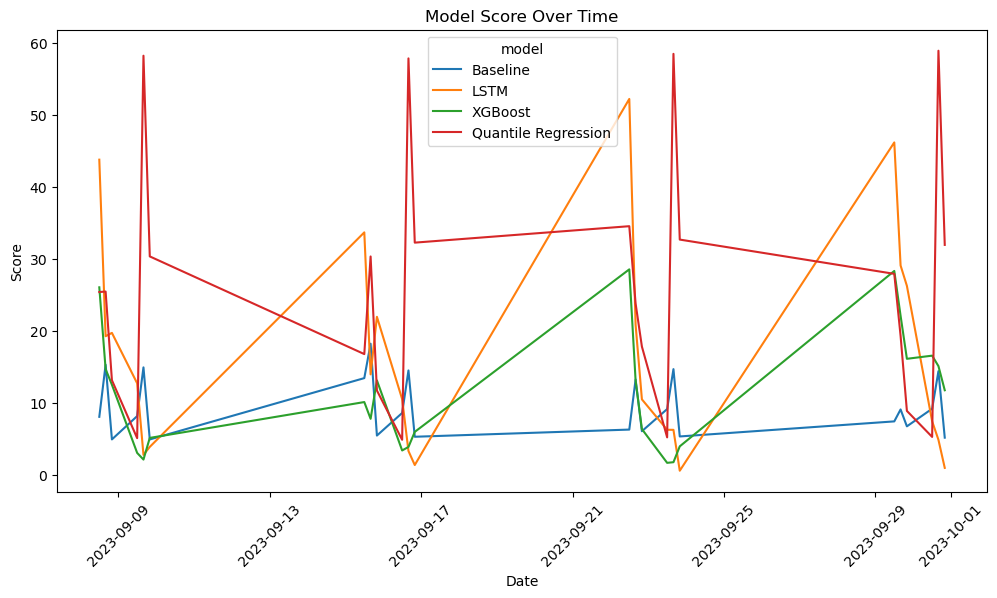

In [18]:
evaluations_3, grouped_scores_3 = run_evaluation(last_years=3, start_date=start_date, end_date=end_date)

### Plot KPIs

In [27]:
# print the scores
print(grouped_scores_5.groupby('model').mean())

                          mean     median       std
model                                              
Baseline              9.568632   9.456873  1.448140
LSTM                 14.027558  14.734158  4.249655
Quantile Regression  29.885582  30.005998  3.199681
XGBoost              11.550520  10.856846  5.758722


In [28]:
print(grouped_scores_4.groupby('model').mean())

                          mean     median       std
model                                              
Baseline              9.568632   9.456873  1.448140
LSTM                 18.674463  19.089810  4.242803
Quantile Regression  28.019605  28.086073  3.031149
XGBoost              11.362526  11.707332  5.552950


In [29]:
print(grouped_scores_3.groupby('model').mean())

                          mean     median       std
model                                              
Baseline              9.568632   9.456873  1.448140
LSTM                 16.634861  16.721092  4.434391
Quantile Regression  26.534244  26.578711  2.876608
XGBoost              11.424191  10.988269  5.925416


In [24]:
# sum of scores
grouped_scores_5['mean'].mean()

16.25807293284582

In [25]:
grouped_scores_4['mean'].mean()

16.906306637750976

In [26]:
grouped_scores_3['mean'].mean()

16.040481943819895

In [29]:
from functions import naive_ensemble

In [92]:
evaluations_3[0]

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,gesamt,weekday,score,model
0,2023-09-07,energy,36 hour,55.734469,59.832875,63.176125,67.500000,73.728750,2023-09-08 12:00:00+02:00,59.82200,4,8.109152,Baseline
1,2023-09-07,energy,40 hour,52.725744,56.560125,60.044250,65.990250,73.522131,2023-09-08 16:00:00+02:00,54.52700,4,15.338382,Baseline
2,2023-09-07,energy,44 hour,47.857481,50.733250,54.314500,58.920563,63.869181,2023-09-08 20:00:00+02:00,54.23500,4,4.973741,Baseline
3,2023-09-07,energy,60 hour,45.991231,50.548063,53.223375,57.200375,62.447850,2023-09-09 12:00:00+02:00,50.08675,5,8.208237,Baseline
4,2023-09-07,energy,64 hour,44.648862,48.210125,51.491625,56.715250,65.587450,2023-09-09 16:00:00+02:00,46.08125,5,14.967617,Baseline
5,2023-09-07,energy,68 hour,42.249187,45.003500,48.243000,52.452750,57.356319,2023-09-09 20:00:00+02:00,47.75450,5,4.968482,Baseline
0,2023-09-14,energy,36 hour,55.734469,59.553500,63.131125,67.500000,73.728750,2023-09-15 12:00:00+02:00,57.87750,4,13.478589,Baseline
1,2023-09-14,energy,40 hour,52.725744,56.506437,60.044250,65.990250,73.522131,2023-09-15 16:00:00+02:00,53.52925,4,18.251101,Baseline
2,2023-09-14,energy,44 hour,47.857481,50.733250,54.108125,58.920563,63.869181,2023-09-15 20:00:00+02:00,54.72150,4,5.507616,Baseline
3,2023-09-14,energy,60 hour,45.991231,50.341062,53.143500,57.200375,62.447850,2023-09-16 12:00:00+02:00,49.81200,5,8.642112,Baseline


Only evaluate for ensembles between basline and LSTM

In [35]:
from functions.naive_ensemble import ensemble

In [108]:
df_models = [evaluations_3[0], evaluations_3[2]]  # Your DataFrames containing the forecasts
weights = [0.69, 0.31]  # Weights for each model's forecast
ensemble_df= ensemble(df_models, weights)
ensemble_df = ensemble_df.reset_index(drop=True)
for index, row in ensemble_df.iterrows():
        quantile_preds = row[['q0.025', 'q0.25', 'q0.5', 'q0.75', 'q0.975']]
        observation = row['gesamt']
        score = evaluation.evaluate_horizon(quantile_preds, observation)
        ensemble_df.at[index, 'score'] = score

In [109]:
ensemble_df

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,gesamt,weekday,score,model
0,2023-09-07,energy,36 hour,54.072591,57.572451,60.158570,63.273751,68.360486,2023-09-08 12:00:00+02:00,59.82200,4,3.901614,Baseline
1,2023-09-07,energy,40 hour,50.695171,53.989463,56.937518,61.059535,67.722552,2023-09-08 16:00:00+02:00,54.52700,4,6.796923,Baseline
2,2023-09-07,energy,44 hour,47.259009,50.021629,52.972805,56.441550,61.072876,2023-09-08 20:00:00+02:00,54.23500,4,5.162849,Baseline
3,2023-09-07,energy,60 hour,46.081628,49.882688,52.520837,55.615825,59.838503,2023-09-09 12:00:00+02:00,50.08675,5,5.988499,Baseline
4,2023-09-07,energy,64 hour,43.948337,47.217337,50.015376,53.697512,61.761063,2023-09-09 16:00:00+02:00,46.08125,5,10.337023,Baseline
5,2023-09-07,energy,68 hour,43.075819,45.580898,48.605148,52.648326,56.088263,2023-09-09 20:00:00+02:00,47.75450,5,5.034984,Baseline
6,2023-09-14,energy,36 hour,53.999168,57.856724,60.708641,63.860887,68.475405,2023-09-15 12:00:00+02:00,57.87750,4,6.557034,Baseline
7,2023-09-14,energy,40 hour,50.659316,54.489948,57.259675,61.471246,67.653847,2023-09-15 16:00:00+02:00,53.52925,4,9.992197,Baseline
8,2023-09-14,energy,44 hour,47.319070,50.451021,53.017849,56.536450,60.888232,2023-09-15 20:00:00+02:00,54.72150,4,5.424823,Baseline
9,2023-09-14,energy,60 hour,46.252588,50.359512,52.546619,55.399754,59.844460,2023-09-16 12:00:00+02:00,49.81200,5,7.029357,Baseline


In [110]:
ensemble_df['score'].mean()

6.992810250038907

In [111]:
import numpy as np
from functions import evaluation

In [112]:
weight_i=np.arange(0,1.1,0.01)
weight_store = dict()

In [128]:
evaluations_3[0]

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,gesamt,weekday,score,model
0,2023-09-07,energy,36 hour,55.734469,59.832875,63.176125,67.500000,73.728750,2023-09-08 12:00:00+02:00,59.82200,4,8.109152,Baseline
1,2023-09-07,energy,40 hour,52.725744,56.560125,60.044250,65.990250,73.522131,2023-09-08 16:00:00+02:00,54.52700,4,15.338382,Baseline
2,2023-09-07,energy,44 hour,47.857481,50.733250,54.314500,58.920563,63.869181,2023-09-08 20:00:00+02:00,54.23500,4,4.973741,Baseline
3,2023-09-07,energy,60 hour,45.991231,50.548063,53.223375,57.200375,62.447850,2023-09-09 12:00:00+02:00,50.08675,5,8.208237,Baseline
4,2023-09-07,energy,64 hour,44.648862,48.210125,51.491625,56.715250,65.587450,2023-09-09 16:00:00+02:00,46.08125,5,14.967617,Baseline
5,2023-09-07,energy,68 hour,42.249187,45.003500,48.243000,52.452750,57.356319,2023-09-09 20:00:00+02:00,47.75450,5,4.968482,Baseline
0,2023-09-14,energy,36 hour,55.734469,59.553500,63.131125,67.500000,73.728750,2023-09-15 12:00:00+02:00,57.87750,4,13.478589,Baseline
1,2023-09-14,energy,40 hour,52.725744,56.506437,60.044250,65.990250,73.522131,2023-09-15 16:00:00+02:00,53.52925,4,18.251101,Baseline
2,2023-09-14,energy,44 hour,47.857481,50.733250,54.108125,58.920563,63.869181,2023-09-15 20:00:00+02:00,54.72150,4,5.507616,Baseline
3,2023-09-14,energy,60 hour,45.991231,50.341062,53.143500,57.200375,62.447850,2023-09-16 12:00:00+02:00,49.81200,5,8.642112,Baseline


In [129]:
for i in weight_i:
    df_models = [evaluations_3[0], evaluations_3[2]]  # Your DataFrames containing the forecasts
    weights = [i, 1-i]  # Weights for each model's forecast
    ensemble_df= ensemble(df_models, weights)
    for index, row in ensemble_df.iterrows():
        quantile_preds = row[['q0.025', 'q0.25', 'q0.5', 'q0.75', 'q0.975']]
        observation = row['gesamt']
        score = evaluation.evaluate_horizon(quantile_preds, observation)
        ensemble_df.at[index, 'score'] = score
    print(i, ensemble_df['score'].sum())
    # store the score
    weight_store[i,1-i] = ensemble_df['score'].sum()
    

0.0 440.6067449035644
0.01 432.95050733886717
0.02 425.2942926623534
0.03 417.6380772229004
0.04 410.60282827465807
0.05 404.1692906372071
0.06 398.61302430175783
0.07 393.05661834838867
0.08 387.50026732666015
0.09 381.94390867553716
0.1 376.38758511962885
0.11 370.83121273559567
0.12 365.2748601879882
0.13 359.71847330810544
0.14 354.16210779052733
0.15 348.60582467041
0.16 343.04945533813475
0.17 337.49312644165036
0.18 331.93676168701177
0.19 326.3803725183105
0.2 321.9273604553222
0.21 317.6980287634278
0.22 313.4687413220214
0.23 309.2394004748535
0.24 305.01008404174786
0.25 300.78077294921866
0.26 296.5514481237792
0.27 292.32214618652336
0.28 288.09284272338846
0.29 283.8635175164794
0.3 279.63423808593734
0.31 275.4048991461181
0.32 271.1755670727538
0.33 266.94622584411604
0.34 262.7169174218748
0.35000000000000003 258.4876242584228
0.36 254.25829523681642
0.37 250.0289776593017
0.38 245.7996455859374
0.39 241.57033640075673
0.4 238.30809232177737
0.41000000000000003 235.319

In [130]:
weight_store

{(0.0, 1.0): 440.6067449035644,
 (0.01, 0.99): 432.95050733886717,
 (0.02, 0.98): 425.2942926623534,
 (0.03, 0.97): 417.6380772229004,
 (0.04, 0.96): 410.60282827465807,
 (0.05, 0.95): 404.1692906372071,
 (0.06, 0.94): 398.61302430175783,
 (0.07, 0.9299999999999999): 393.05661834838867,
 (0.08, 0.92): 387.50026732666015,
 (0.09, 0.91): 381.94390867553716,
 (0.1, 0.9): 376.38758511962885,
 (0.11, 0.89): 370.83121273559567,
 (0.12, 0.88): 365.2748601879882,
 (0.13, 0.87): 359.71847330810544,
 (0.14, 0.86): 354.16210779052733,
 (0.15, 0.85): 348.60582467041,
 (0.16, 0.84): 343.04945533813475,
 (0.17, 0.83): 337.49312644165036,
 (0.18, 0.8200000000000001): 331.93676168701177,
 (0.19, 0.81): 326.3803725183105,
 (0.2, 0.8): 321.9273604553222,
 (0.21, 0.79): 317.6980287634278,
 (0.22, 0.78): 313.4687413220214,
 (0.23, 0.77): 309.2394004748535,
 (0.24, 0.76): 305.01008404174786,
 (0.25, 0.75): 300.78077294921866,
 (0.26, 0.74): 296.5514481237792,
 (0.27, 0.73): 292.32214618652336,
 (0.28, 0.72

In [131]:
# get the best weight
best_weight = min(weight_store, key=weight_store.get)

In [132]:
best_weight

(0.6900000000000001, 0.30999999999999994)

In [133]:
weight_store_df = pd.DataFrame.from_dict(weight_store, orient='index')

In [134]:
weight_store_df

,0
"(0.0, 1.0)",440.606745
"(0.01, 0.99)",432.950507
"(0.02, 0.98)",425.294293
"(0.03, 0.97)",417.638077
"(0.04, 0.96)",410.602828
...,...
"(1.05, -0.050000000000000044)",213.347331
"(1.06, -0.06000000000000005)",214.188010
"(1.07, -0.07000000000000006)",215.481024
"(1.08, -0.08000000000000007)",216.917328


In [135]:
weight_store[best_weight]

187.62137042236327

In [ ]:
def total(initial=5, num):